In [138]:
# import libraries
import os
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [139]:
# read in files
student_df = pd.read_csv("Resources/student data.csv")
academic_performance_df = pd.read_csv("Resources/Effects on Academic Performance.csv")

In [140]:
# CLEANING DATA

In [141]:
# show column names
student_columns = student_df.columns
student_columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [142]:
student_df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [143]:
# rename columns
student_df.columns = ['Timestamp', 'Gender', 'Age', 'Course',
       'Year', 'GPA', 'Marital_status',
       'Depression', 'Anxiety',
       'Panic_attack',
       'Specialist_visit']

In [144]:
# delete timestamp column
del student_df['Timestamp']

In [145]:
student_df.head()

,Gender,Age,Course,Year,GPA,Marital_status,Depression,Anxiety,Panic_attack,Specialist_visit
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [146]:
# count how many total students
total_students = len(student_df["Gender"])
total_students

101

In [147]:
# make sure every column has same count
student_df.count()

Gender              101
Age                 100
Course              101
Year                101
GPA                 101
Marital_status      101
Depression          101
Anxiety             101
Panic_attack        101
Specialist_visit    101
dtype: int64

In [148]:
# see data types
student_df.dtypes

Gender               object
Age                 float64
Course               object
Year                 object
GPA                  object
Marital_status       object
Depression           object
Anxiety              object
Panic_attack         object
Specialist_visit     object
dtype: object

In [149]:
# count male vs female
student_df["Gender"].value_counts()

Female    75
Male      26
Name: Gender, dtype: int64

In [150]:
# show different courses
student_df["Course"].value_counts()

BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Human Reso

In [151]:
# Clean up Course column
student_df['Course'] = student_df['Course'].replace({'Koe': 'KOE','koe': 'KOE'})
student_df['Course'] = student_df['Course'].replace({'benl': 'BENL', 'Benl': 'BENL'})
student_df['Course'] = student_df['Course'].replace({'engin': 'Engineering','Engine': 'Engineering'})
student_df['Course'] = student_df['Course'].replace({'KIRKHS': 'Kirkhs'})
student_df['Course'] = student_df['Course'].replace({'Islamic education': 'Islamic Education'})
student_df['Course'] = student_df['Course'].replace({'Laws': 'Law'})
student_df['Course'] = student_df['Course'].replace({'Pendidikan islam': 'Pendidikan Islam', 'Pendidikan Islam ': 'Pendidikan Islam'})
student_df['Course'] = student_df['Course'].replace({'Diploma Nursing': 'Nursing', 'Nursing ': 'Nursing'})
student_df['Course'] = student_df['Course'].replace({'Fiqh' : 'Fiqh Fatwa ', 'Fiqh Fatwa': 'Fiqh Fatwa'})
student_df['Course'] = student_df['Course'].replace({'Econs' : 'Econ'})
student_df['Course'] = student_df['Course'].replace({'Irkhs' : 'Kirkhs'})
student_df['Course'] = student_df['Course'].replace({'ENM' : 'KENMS'})
student_df['Course'] = student_df['Course'].replace({'psychology' : 'Psychology'})

In [152]:
student_df["Course"].value_counts()

Engineering                20
BCS                        18
BIT                        10
KOE                         6
Biomedical science          4
Law                         3
Pendidikan Islam            3
BENL                        3
Kirkhs                      3
Psychology                  3
KENMS                       2
Nursing                     2
Islamic Education           2
Human Sciences              1
Malcom                      1
Kop                         1
Radiography                 1
Biotechnology               1
Communication               1
Econ                        1
Fiqh fatwa                  1
DIPLOMA TESL                1
MHSC                        1
TAASL                       1
CTS                         1
IT                          1
ALA                         1
Usuluddin                   1
Business Administration     1
Banking Studies             1
Marine science              1
Accounting                  1
Human Resources             1
Mathemathi

In [153]:
# clean up Year column
student_df['Year'] = student_df['Year'].replace({'year 1': 'Year 1'})
student_df['Year'] = student_df['Year'].replace({'year 2': 'Year 2'})
student_df['Year'] = student_df['Year'].replace({'year 3': 'Year 3'})
student_df['Year'] = student_df['Year'].replace({'year 4': 'Year 4'})

In [154]:
student_df["Year"].value_counts()

Year 1    43
Year 2    26
Year 3    24
Year 4     8
Name: Year, dtype: int64

In [155]:
# clean up GPA column
student_df['GPA'] = student_df['GPA'].replace({'3.50 - 4.00 ': '3.50 - 4.00'})

In [156]:
student_df["GPA"].value_counts()

3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        4
2.00 - 2.49     2
Name: GPA, dtype: int64

In [157]:
# Question:
# Different years of college create different stress levels. Which year creates the most mental strain on college students?

In [158]:
#Data Frame working off of
student_df

,Gender,Age,Course,Year,GPA,Marital_status,Depression,Anxiety,Panic_attack,Specialist_visit
0,Female,18.0,Engineering,Year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic Education,Year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Law,Year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,Year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,BCS,Year 1,3.50 - 4.00,No,No,Yes,No,No
97,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,Female,23.0,Pendidikan Islam,Year 4,3.50 - 4.00,No,No,No,No,No


In [159]:
# New Data Frame with only students in Year 1 and total count of students in that year
year1_data = student_df.loc[student_df['Year'] == "Year 1"]
count_year1 = len(year1_data)

# New Data Frame with only students in Year 2 and total count of students in that year
year2_data = student_df.loc[student_df['Year'] == "Year 2"]
count_year2 = len(year2_data)

# New Data Frame with only students in Year 3 and total count of students in that year
year3_data = student_df.loc[student_df['Year'] == "Year 3"]
count_year3 = len(year3_data)

# New Data Frame with only students in Year 4 and total count of students in that year
year4_data = student_df.loc[student_df['Year'] == "Year 4"]
count_year4 = len(year4_data)

In [160]:
# Calculate percentage of how many were depressed within Year 

# Calculate the number of depressed Year 1
year1_dep = year1_data.loc[year1_data['Depression'] == "Yes"]
count_year1_dep = len(year1_dep)
# Calculate percentage depressed Year 1
per_year1_dep = (count_year1_dep/count_year1) *100
 
# Calculate the number of depressed Year 2
year2_dep = year2_data.loc[year2_data['Depression'] == "Yes"]
count_year2_dep = len(year2_dep)
# Calculate percentage depressed Year 2
per_year2_dep = (count_year2_dep/count_year2) *100

# Calculate the number of depressed Year 3
year3_dep = year3_data.loc[year3_data['Depression'] == "Yes"]
count_year3_dep = len(year3_dep)
# Calculate percentage depressed Year 3
per_year3_dep = (count_year3_dep/count_year3) *100

# Calculate the number of depressed Year 4
year4_dep = year4_data.loc[year4_data['Depression'] == "Yes"]
count_year4_dep = len(year4_dep)
# Calculate percentage depressed Year 4
per_year4_dep = (count_year4_dep/count_year4) *100

In [161]:
# Calculate percentage of how many were anxious within Year 

# Calculate the number of anxious Year 1
year1_anx = year1_data.loc[year1_data['Anxiety'] == "Yes"]
count_year1_anx = len(year1_anx)
# Calculate percentage anxious Year 1
per_year1_anx = (count_year1_anx/count_year1) *100
 
# Calculate the number of anxious Year 2
year2_anx = year2_data.loc[year2_data['Anxiety'] == "Yes"]
count_year2_anx = len(year2_anx)
# Calculate percentage anxious Year 2
per_year2_anx = (count_year2_anx/count_year2) *100

# Calculate the number of anxious Year 3
year3_anx = year3_data.loc[year3_data['Anxiety'] == "Yes"]
count_year3_anx = len(year3_anx)
# Calculate percentage anxious Year 3
per_year3_anx = (count_year3_anx/count_year3) *100

# Calculate the number of anxious Year 4
year4_anx = year4_data.loc[year4_data['Anxiety'] == "Yes"]
count_year4_anx = len(year4_anx)
# Calculate percentage anxious Year 4
per_year4_anx = (count_year4_anx/count_year4) *100

In [162]:
# Calculate percentage of how many had a panic attack within Year 

# Calculate the number of how many had a panic attack Year 1
year1_pa = year1_data.loc[year1_data['Panic_attack'] == "Yes"]
count_year1_pa = len(year1_pa)
# Calculate percentage how many had a panic attack Year 1
per_year1_pa = (count_year1_pa/count_year1) *100

# Calculate the number of how many had a panic attack Year 2
year2_pa = year2_data.loc[year2_data['Panic_attack'] == "Yes"]
count_year2_pa = len(year2_pa)
# Calculate percentage of how many had a panic attack Year 2
per_year2_pa = (count_year2_pa/count_year2) *100

# Calculate the number of how many had a panic attack Year 3
year3_pa = year3_data.loc[year3_data['Panic_attack'] == "Yes"]
count_year3_pa = len(year3_pa)
# Calculate percentage of how many had a panic attack Year 3
per_year3_pa = (count_year3_dep/count_year3) *100

# Calculate the number of how many had a panic attack Year 4
year4_pa = year4_data.loc[year4_data['Panic_attack'] == "Yes"]
count_year4_pa = len(year4_pa)
# Calculate percentage of how many had a panic attack Year 4
per_year4_pa = (count_year4_pa/count_year4) *100

In [163]:
# Calculate percentage of those who saw a specialist within Year 

# Calculate the number of specialist visits Year 1
year1_sv = year1_data.loc[year1_data['Specialist_visit'] == "Yes"]
count_year1_sv = len(year1_sv)
# Calculate percentage of specialist visits Year 1
per_year1_sv = (count_year1_sv/count_year1) *100
 
# Calculate the number of specialist visits Year 2
year2_sv = year2_data.loc[year2_data['Specialist_visit'] == "Yes"]
count_year2_sv = len(year2_sv)
# Calculate percentage of specialist visits Year 2
per_year2_sv = (count_year2_sv/count_year2) *100

# Calculate the number of specialist visits Year 3
year3_sv = year3_data.loc[year3_data['Specialist_visit'] == "Yes"]
count_year3_sv = len(year3_sv)
# Calculate percentage of specialist visits Year 3
per_year3_sv = (count_year3_sv/count_year3) *100

# Calculate the number of specialist visits Year 4
year4_sv = year4_data.loc[year4_data['Specialist_visit'] == "Yes"]
count_year4_sv = len(year4_sv)
# Calculate percentage of specialist visits Year 4
per_year4_sv = (count_year4_sv/count_year4) *100

In [173]:
# import matplotlib.pyplot as plt
# from importlib import reload
# plt=reload(plt)

  Mental Health Categories     Year 1     Year 2     Year 3  Year 4
0               Depression  32.558140  38.461538  41.666667    12.5
1                  Anxiety  32.558140  38.461538  33.333333    25.0
2            Panic Attacks  32.558140  30.769231  41.666667    12.5
3         Specialist Visit   6.976744   7.692308   4.166667     0.0


Text(0.5, 1.0, 'Comparing Mental Health Status to Grade Year in College (By Percentages)')

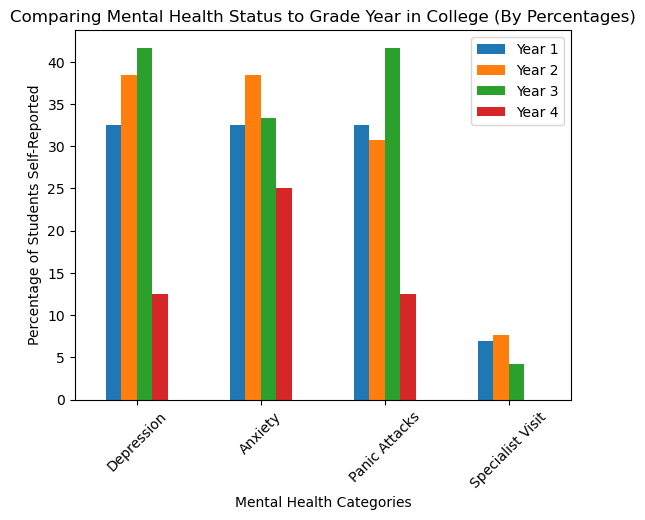

In [181]:
#Create a bar graph to compare all of the mental health categories by grade level, by percentages, to see which grade is more stressful.

# Create data that we want to plot
percentages_suffering = pd.DataFrame([['Depression', per_year1_dep, per_year2_dep, per_year3_dep, per_year4_dep], 
                ['Anxiety', per_year1_anx, per_year2_anx, per_year3_anx, per_year4_anx], 
                ['Panic Attacks', per_year1_pa, per_year2_pa, per_year3_pa, per_year4_pa], 
                ['Specialist Visit', per_year1_sv, per_year2_sv, per_year3_sv, per_year4_sv]],
                columns= ['Mental Health Categories', 'Year 1', 'Year 2', 'Year 3', 'Year 4'])
# View data to be plotted
print(percentages_suffering)

# Plot/label grouped bar chart
percentages_suffering.plot(x="Mental Health Categories", kind='bar', stacked=False)
plt.ylabel("Percentage of Students Self-Reported")
plt.xlabel("Mental Health Categories")
plt.xticks(rotation = 45)
plt.title("Comparing Mental Health Status to Grade Year in College (By Percentages)")

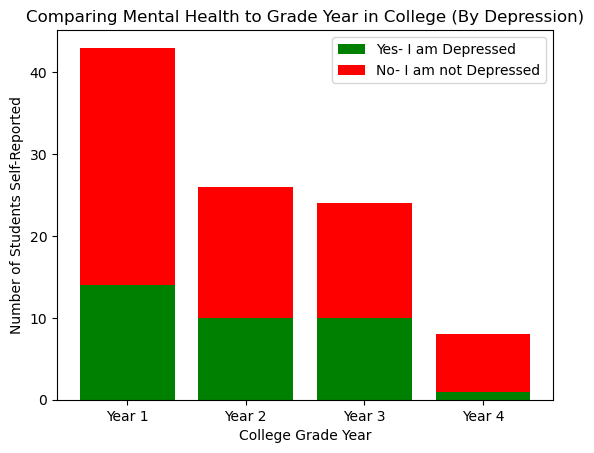

In [197]:
# Create a stacked bar graph to show a break down of how many total students in each grade reported Mental Health Issues

# Create data to plot Depression comaprison
x = ['Year 1', 'Year 2', 'Year 3', 'Year 4']
y1 = [count_year1_dep, count_year2_dep, count_year3_dep, count_year4_dep]
y2 = [(count_year1-count_year1_dep), (count_year2-count_year3_dep), (count_year3-count_year3_dep), (count_year4-count_year4_dep)]
 
# plot bars in stack manner
plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='r')
plt.ylabel("Number of Students Self-Reported")
plt.xlabel("College Grade Year")
plt.title("Comparing Mental Health to Grade Year in College (By Depression)")
plt.legend(["Yes- I am Depressed", "No- I am not Depressed"])
plt.show()

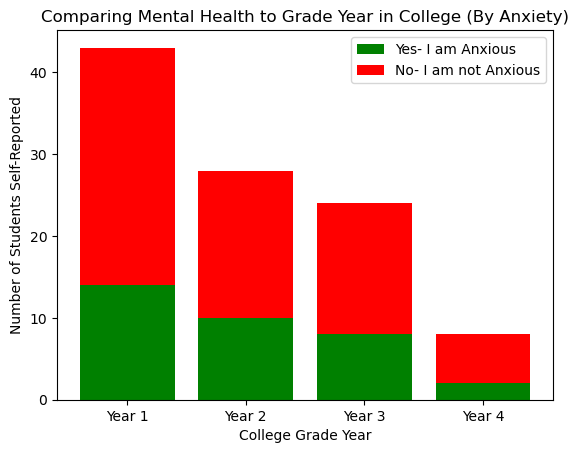

In [196]:
# Create data to plot Anxiety comaprison
x = ['Year 1', 'Year 2', 'Year 3', 'Year 4']
y1 = [count_year1_anx, count_year2_anx, count_year3_anx, count_year4_anx]
y2 = [(count_year1-count_year1_anx), (count_year2-count_year3_anx), (count_year3-count_year3_anx), (count_year4-count_year4_anx)]
 
# plot bars in stack manner
plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='r')
plt.ylabel("Number of Students Self-Reported")
plt.xlabel("College Grade Year")
plt.title("Comparing Mental Health to Grade Year in College (By Anxiety)")
plt.legend(["Yes- I am Anxious", "No- I am not Anxious"])
plt.show()

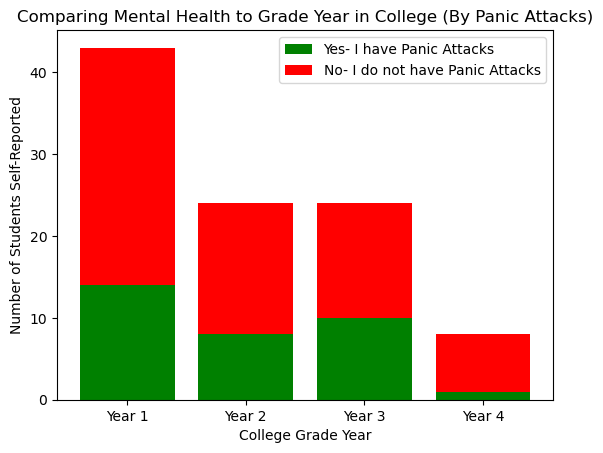

In [195]:
# Create data to plot Panic Attack comaprison
x = ['Year 1', 'Year 2', 'Year 3', 'Year 4']
y1 = [count_year1_pa, count_year2_pa, count_year3_pa, count_year4_pa]
y2 = [(count_year1-count_year1_pa), (count_year2-count_year3_pa), (count_year3-count_year3_pa), (count_year4-count_year4_pa)]
 
# plot bars in stack manner
plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='r')
plt.ylabel("Number of Students Self-Reported")
plt.xlabel("College Grade Year")
plt.title("Comparing Mental Health to Grade Year in College (By Panic Attacks)")
plt.legend(["Yes- I have Panic Attacks", "No- I do not have Panic Attacks"])
plt.show()

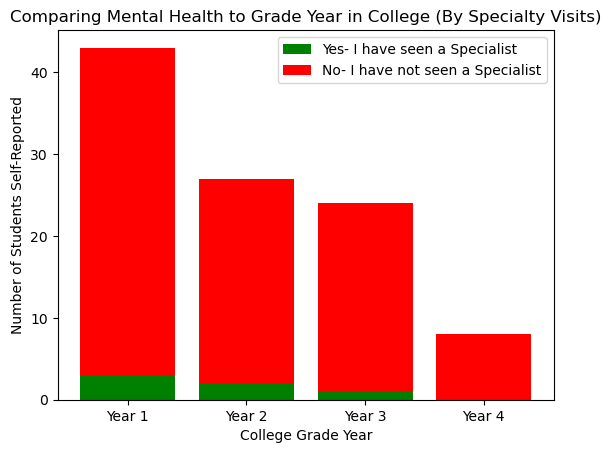

In [194]:
# Create data to plot Specialist Visit comaprison
x = ['Year 1', 'Year 2', 'Year 3', 'Year 4']
y1 = [count_year1_sv, count_year2_sv, count_year3_sv, count_year4_sv]
y2 = [(count_year1-count_year1_sv), (count_year2-count_year3_sv), (count_year3-count_year3_sv), (count_year4-count_year4_sv)]
 
# plot bars in stack manner
plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='r')
plt.ylabel("Number of Students Self-Reported")
plt.xlabel("College Grade Year")
plt.title("Comparing Mental Health to Grade Year in College (By Specialty Visits)")
plt.legend(["Yes- I have seen a Specialist", "No- I have not seen a Specialist"])
plt.show()